# Lending club  default prediction
    
    Dataset from : https://www.kaggle.com/wendykan/lending-club-loan-data
    These files include loan data, a matrix of about 890 thousand observations and 75 variables. Variables are things like loan status, credit score, number of finance inquries, address and state. 
    
    Exercises good for this data: missing data imputation, data visualization, feature exploration,  imbalanced data processing and machine learning modelling 


### load data and missing data imputation

In [ ]:
import pandas as pd
import datetime as dt

In [3]:
import sys
sys.executable

'/Users/yichu/anaconda/envs/py3k/bin/python'

In [1]:
!type python

python is /usr/local/bin/python


In [3]:
sys.path

['',
 '/Users/yichu/anaconda/envs/py3k/lib/python36.zip',
 '/Users/yichu/anaconda/envs/py3k/lib/python3.6',
 '/Users/yichu/anaconda/envs/py3k/lib/python3.6/lib-dynload',
 '/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages',
 '/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/aeosa',
 '/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/IPython/extensions',
 '/Users/yichu/.ipython']

In [2]:
import seaborn as sns
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [22]:
loan=pd.read_csv('loan.csv')

/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
loan.shape

(887379, 74)

In [12]:
# then check length of unique rows in one columns

In [23]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
loan['member_id'].count()

887379

In [23]:
# function to return percent of missing data in column

In [24]:
def percent_empty(df):
    
    bools=df.isnull().tolist()
    percent_empty=float(bools.count(True))/float(len(bools))
    
    return percent_empty, float(bools.count(True))  # return both percentage and counts of null values

In [25]:
percent_empty(loan['tot_cur_bal'])

(0.07919502264534094, 70276.0)

In [26]:
# now get emptiness percentages for all features
emptiness=[]
missing_columns=[]

for i in range(loan.shape[1]):
    
    p,n =percent_empty(loan.iloc[:,i])
    
    if n>0:
        missing_columns.append(loan.columns.values[i])
        emptiness.append(round((p),2))

In [28]:
empty_dict=dict(zip(missing_columns,emptiness))

In [30]:
#sort dictionaries by values
sorted(empty_dict.items(),key=lambda x:x[1])

[('annual_inc', 0.0),
 ('title', 0.0),
 ('delinq_2yrs', 0.0),
 ('earliest_cr_line', 0.0),
 ('inq_last_6mths', 0.0),
 ('open_acc', 0.0),
 ('pub_rec', 0.0),
 ('revol_util', 0.0),
 ('total_acc', 0.0),
 ('last_credit_pull_d', 0.0),
 ('collections_12_mths_ex_med', 0.0),
 ('acc_now_delinq', 0.0),
 ('last_pymnt_d', 0.02),
 ('emp_length', 0.05),
 ('emp_title', 0.06),
 ('tot_coll_amt', 0.08),
 ('tot_cur_bal', 0.08),
 ('total_rev_hi_lim', 0.08),
 ('next_pymnt_d', 0.29),
 ('mths_since_last_delinq', 0.51),
 ('mths_since_last_major_derog', 0.75),
 ('mths_since_last_record', 0.85),
 ('desc', 0.86),
 ('open_acc_6m', 0.98),
 ('open_il_6m', 0.98),
 ('open_il_12m', 0.98),
 ('open_il_24m', 0.98),
 ('mths_since_rcnt_il', 0.98),
 ('total_bal_il', 0.98),
 ('il_util', 0.98),
 ('open_rv_12m', 0.98),
 ('open_rv_24m', 0.98),
 ('max_bal_bc', 0.98),
 ('all_util', 0.98),
 ('inq_fi', 0.98),
 ('total_cu_tl', 0.98),
 ('inq_last_12m', 0.98),
 ('annual_inc_joint', 1.0),
 ('dti_joint', 1.0),
 ('verification_status_joint

*  how to treat missing values?
* 1. remove features with too many missing value
* 2. if not missing at random, add new level to represnt na, impute with 0
* 3. if missing at random, imputation using summary stats like mean or median or modeling

* Here is a summary about what i want to do with the rest of missing values: Even though not too much missing for last_payment day , this can be very personal and varies a lot im not sure filling with median value is a good option, clearly there should be some record on files worth checking out first, so i will delete this first same rational for mths_since_last_delinq,next_pymnt_d and emp_title, then fill in the rest with median values

In [45]:
delete_list_due_tounknown=['last_pymnt_d','next_pymnt_d','mths_since_last_delinq']

In [47]:
loan=loan.drop(delete_list_due_tounknown,axis=1)

In [9]:
fill_median=['emp_length','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [10]:
categorical_list=['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
for i in categorical_list:
    loan[i]=loan[i].fillna(loan[i].median())

In [61]:
# now check missing values
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

In [49]:
loan=loan.drop('title', axis=1)

In [34]:
loan.shape

(887379, 70)

In [132]:
loan['last_credit_pull_d'].mode()

0    Jan-2016
dtype: object

In [52]:
#now fill the rest numerical columns with median values
for i in loan.columns.values:
    if loan[i].isnull().sum()>0 and loan[i].dtype!='object':
    
        loan[i]=loan[i].fillna(loan[i].median())
    elif loan[i].isnull().sum()>0 and loan[i].dtype=='object':
        loan[i]=loan[i].fillna(loan[i].mode()[0])

In [53]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

In [ ]:
# great! now there is no missing values!

In [62]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [63]:
# now here are the categorical data
loan['earliest_cr_line'].describe()

count       887379
unique         697
top       Aug-2001
freq          6688
Name: earliest_cr_line, dtype: object

In [35]:
delete_list=[]
for k,v in empty_dict.items():
    if v>=0.80:
        
        delete_list.append(k)

In [36]:
delete_list

['desc',
 'mths_since_last_record',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [86]:
len(delete_list)

19

In [37]:
loan=loan.drop(columns=delete_list,axis=1)

In [ ]:
# also drop the one with 75% missing

In [39]:
loan=loan.drop('mths_since_last_major_derog', axis=1)

In [54]:
loan.shape

(887379, 49)

In [55]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0.00,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,1.11,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0.00,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,0.00,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,0.00,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,0.00,161.03,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,0.00,170.08,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,0.00,111.34,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,2.09,152.39,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,2.52,121.45,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0


## Explore  categorical features that might be predictive

In [67]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [68]:
categoricat_columns=[i for i in loan.columns.values if loan[i].dtype=='object' ]



In [69]:
categoricat_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_credit_pull_d',
 'application_type']

### Use visualization to explore categorical data

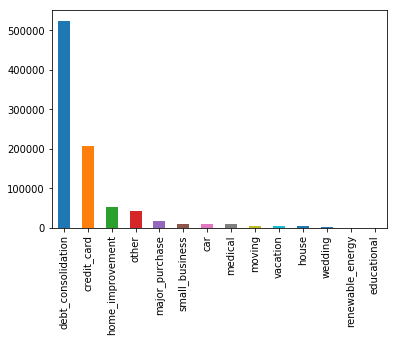

In [195]:
loan['purpose'].value_counts().plot(kind='bar')
plt.show()

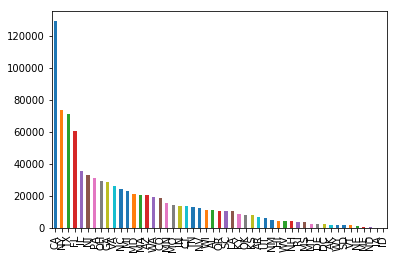

In [199]:
loan['addr_state'].value_counts().plot(kind='bar')
plt.show()                # could this be biased based on where the company is located?

In [70]:
loan['earliest_cr_line'].head(4)

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
Name: earliest_cr_line, dtype: object

### format of date

In [71]:
convert_dt=lambda x:dt.datetime.strptime(x,"%b-%Y")

In [72]:
loan['earliest_reported_time']=loan.earliest_cr_line.apply(convert_dt)

In [ ]:
# i wanna take out the year only again

In [73]:
loan['earliest_reported_year']=loan['earliest_reported_time'].apply(lambda x:x.year)

In [74]:
loan['earliest_reported_year'].describe()

count    887379.000000
mean       1997.700289
std           7.434035
min        1944.000000
25%        1994.000000
50%        1999.000000
75%        2003.000000
max        2012.000000
Name: earliest_reported_year, dtype: float64

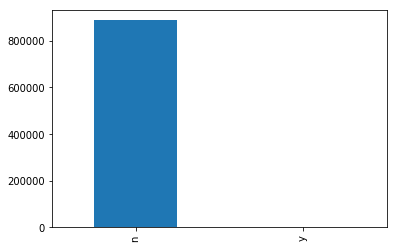

In [75]:
loan['pymnt_plan'].value_counts().plot(kind='bar')
plt.show()     # binary categorical?? not sure about this: indicates if payment plan has been put in place for the loan

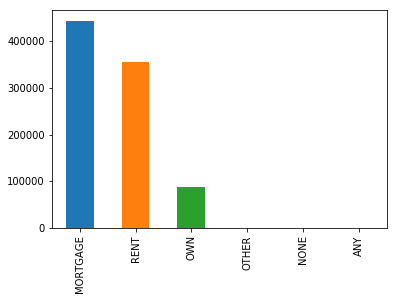

In [177]:
loan['home_ownership'].value_counts().plot(kind='bar')
plt.show()

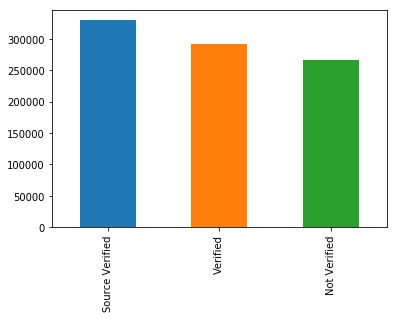

In [178]:
loan['verification_status'].value_counts().plot(kind='bar')
plt.show()

In [183]:
# dates could be transformed to date objecy and maybe just try to use year

In [77]:
convert_dt=lambda x:dt.datetime.strptime(x,"%b-%Y")

In [78]:
loan['issue_time']=loan.issue_d.apply(convert_dt)

In [79]:
#now check it out
loan['issue_time'].describe()    # why there is even minute and second?

count                  887379
unique                    103
top       2015-10-01 00:00:00
freq                    48631
first     2007-06-01 00:00:00
last      2015-12-01 00:00:00
Name: issue_time, dtype: object

In [80]:
loan['issue_time'].head(3)

0   2011-12-01
1   2011-12-01
2   2011-12-01
Name: issue_time, dtype: datetime64[ns]

In [81]:
loan['issue_year']=loan['issue_time'].apply(lambda x:x.year)

In [82]:
loan['issue_year'].value_counts()

2015    421094
2014    235628
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64

In [ ]:
# after transforming to year may seem to be a reasonable predictive categorical data

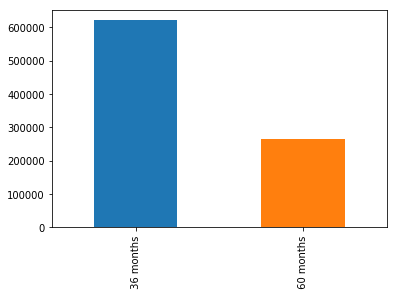

In [172]:
loan['term'].value_counts().plot(kind='bar')
plt.show()

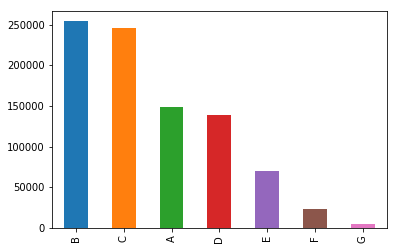

In [173]:
loan['grade'].value_counts().plot(kind='bar')
plt.show()

In [174]:
loan.groupby('grade').count()['int_rate']   #highly correlated??

grade
A    148202
B    254535
C    245860
D    139542
E     70705
F     23046
G      5489
Name: int_rate, dtype: int64

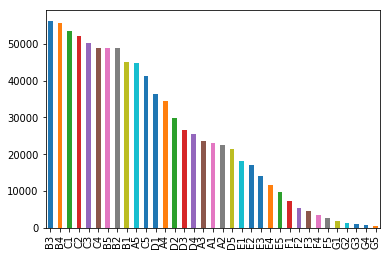

In [175]:
loan['sub_grade'].value_counts().plot(kind='bar')   # might be too many
plt.show()

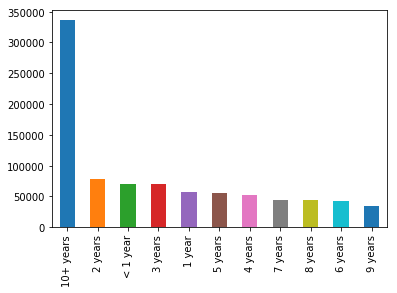

In [176]:
loan['emp_length'].value_counts().plot(kind='bar')
plt.show()  

In [ ]:
# dont see much difference in each category, may not be very predicative?

In [83]:
numerical_columns=[i for i in loan.columns.values if loan[i].dtype!='object' ]

In [84]:
response=loan['int_rate']

In [152]:
loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

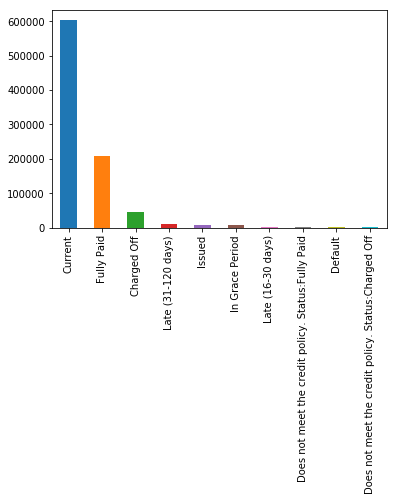

In [156]:
loan['loan_status'].value_counts().plot(kind='bar')
plt.show()

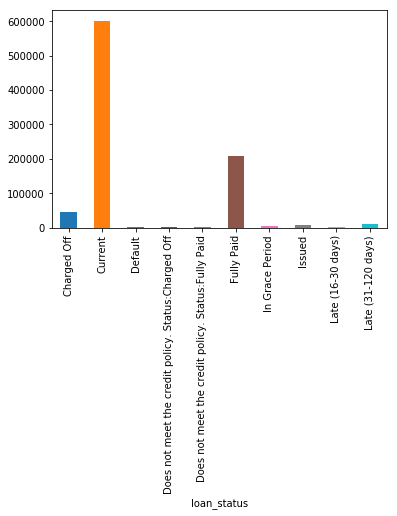

In [157]:
loan.groupby('loan_status').size().plot(kind='bar')

In [85]:
loan.groupby('loan_status').count()['int_rate']

loan_status
Charged Off                                             45248
Current                                                601779
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             207723
In Grace Period                                          6253
Issued                                                   8460
Late (16-30 days)                                        2357
Late (31-120 days)                                      11591
Name: int_rate, dtype: int64

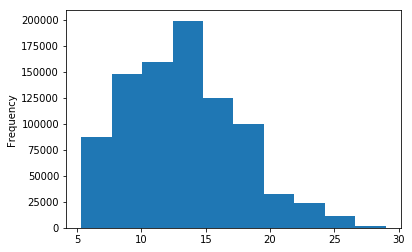

In [164]:
loan['int_rate'].plot(kind='hist')   # almost normal

In [87]:
loan.to_csv(path_or_buf='loan_clean.csv') # this took a long time to save

In [88]:
import pickle

filename='loan_clean.pkl'
pickle.dump(loan, open(filename, 'wb'))   # this is much shorter

In [139]:
# now save loan_copy which convert loan_Status into loan_condition a binary category for further binary
# logistic regression us
import pickle
filename='loan_copy.pkl'
pickle.dump(loan_copy, open(filename, 'wb')) 

In [4]:
# now load the pickle file, so much faster
import pickle
filename='loan_clean.pkl'
loaded_test = pickle.load(open(filename, 'rb'))
loaded_test.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_reported_time,earliest_reported_year,issue_time,issue_year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1985-01-01,1985,2011-12-01,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1999-04-01,1999,2011-12-01,2011


In [3]:
loan.shape

(887379, 53)

In [6]:
# now let me explore numerical data
loan.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_reported_time',
       'earliest_reported_year', 'issue_time', 'issue_year'], dtype=object)

In [10]:
loan['issue_year'].unique()

array([2011, 2010, 2009, 2008, 2007, 2013, 2012, 2014, 2015])

In [92]:
len(numerical_columns)

36

In [93]:
# compute matrix of correlation coefficients only between numerical data
numerical_loan=loan[numerical_columns]

In [94]:
numerical_loan.shape

(887379, 36)

<Figure size 5184x5184 with 0 Axes>

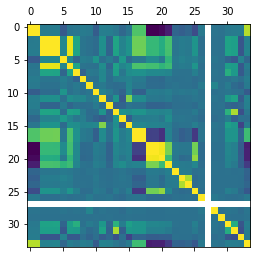

In [96]:
# check out correlations
plt.figure(figsize=(72,72))
plt.matshow(numerical_loan.corr())


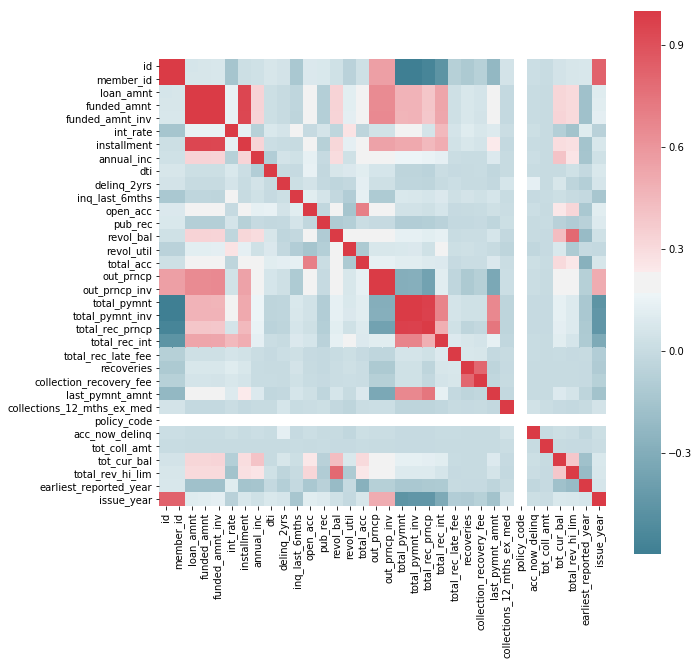

In [100]:
# or seaborn's heatmap
import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
corr=numerical_loan.corr()
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,ax=ax)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [121]:
c1.sort_values(ascending=False)[34:100]

out_prncp                out_prncp_inv              0.999997
id                       member_id                  0.999443
member_id                id                         0.999443
loan_amnt                funded_amnt                0.999263
funded_amnt              loan_amnt                  0.999263
                         funded_amnt_inv            0.998025
funded_amnt_inv          funded_amnt                0.998025
total_pymnt_inv          total_pymnt                0.997592
total_pymnt              total_pymnt_inv            0.997592
funded_amnt_inv          loan_amnt                  0.997115
loan_amnt                funded_amnt_inv            0.997115
total_pymnt              total_rec_prncp            0.970043
total_rec_prncp          total_pymnt                0.970043
                         total_pymnt_inv            0.967496
total_pymnt_inv          total_rec_prncp            0.967496
funded_amnt              installment                0.946005
installment             

### clearly there are a lot high correlated that need to be deleted, multicolinearity

In [126]:
response.shape

(887379,)

In [129]:
loan['loan_amnt'].describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [141]:
# now i want to see int rate ' correlation with all the other numerical data

In [155]:
dic={}

for i in numerical_columns:
    if loan[i].dtype=='int64' or loan[i].dtype=='float64':
        dic[i]=abs(loan['int_rate'].corr(loan[i]))
    

In [157]:
sorted(dic.items(), key=lambda x:x[1])

[('tot_coll_amt', 0.0013664652958735848),
 ('open_acc', 0.010377811176088478),
 ('collections_12_mths_ex_med', 0.013343762415308108),
 ('acc_now_delinq', 0.026479918711749848),
 ('revol_bal', 0.03570808971387735),
 ('total_acc', 0.03861451645698693),
 ('out_prncp_inv', 0.04252900563899369),
 ('out_prncp', 0.0426713702798813),
 ('pub_rec', 0.052164978363227525),
 ('total_rec_prncp', 0.054975269470971026),
 ('delinq_2yrs', 0.05518735995209443),
 ('total_rec_late_fee', 0.057150121492005726),
 ('issue_year', 0.06363242890390325),
 ('collection_recovery_fee', 0.07086705786460487),
 ('annual_inc', 0.07278450706650287),
 ('dti', 0.07990255119047857),
 ('tot_cur_bal', 0.08290771222665622),
 ('last_pymnt_amnt', 0.10117860027915267),
 ('earliest_reported_year', 0.10443302697978345),
 ('recoveries', 0.10683995897188499),
 ('installment', 0.13307491860541137),
 ('member_id', 0.1422052957748822),
 ('id', 0.14296288025490284),
 ('loan_amnt', 0.14502309929883958),
 ('funded_amnt', 0.1451603371515694)

In [ ]:
# so i would guess the most predictive features to interest rate are the ones with highest correlation coefficients

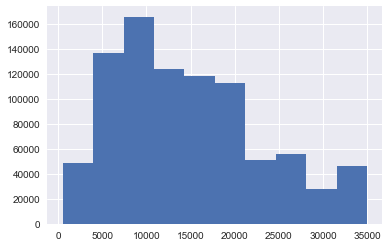

In [161]:
loan['loan_amnt'].hist()

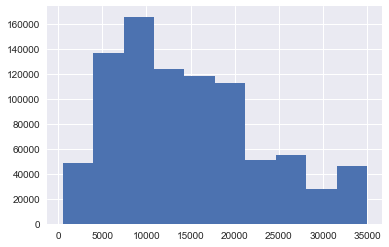

In [162]:
loan['funded_amnt'].hist()

In [165]:
loan['issue_year'].value_counts()

2015    421094
2014    235628
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64

In [166]:
loan['issue_year'].dtype

dtype('int64')

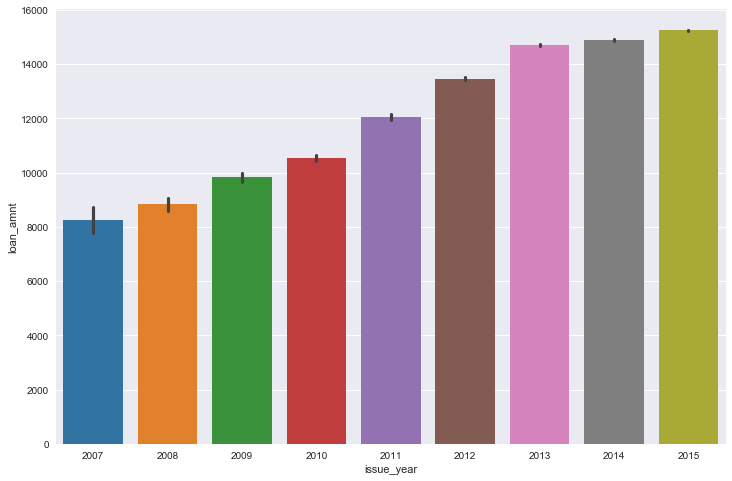

In [167]:
plt.figure(figsize=(12,8))
sns.barplot('issue_year','loan_amnt',data=loan,palette='tab10')

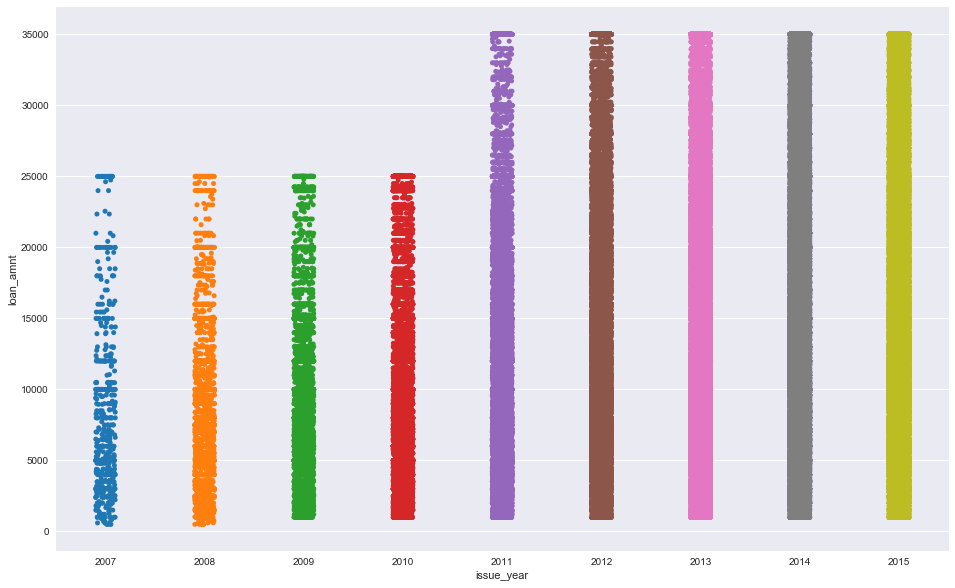

In [169]:
plt.figure(figsize=(16,10))
sns.stripplot('issue_year','loan_amnt',data=loan,palette='tab10',jitter=True)

In [175]:
loan.groupby('issue_year')['int_rate'].count()


issue_year
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134755
2014    235628
2015    421094
Name: int_rate, dtype: int64

In [176]:
loan.groupby('issue_year').count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_reported_time,earliest_reported_year,issue_time
issue_year,,,,,,,,,,,,,,,,,,,,,
2007,603,603,603,603,603,603,603,603,603,603,...,603,603,603,603,603,603,603,603,603,603
2008,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,...,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393
2009,5281,5281,5281,5281,5281,5281,5281,5281,5281,5281,...,5281,5281,5281,5281,5281,5281,5281,5281,5281,5281
2010,12537,12537,12537,12537,12537,12537,12537,12537,12537,12537,...,12537,12537,12537,12537,12537,12537,12537,12537,12537,12537
2011,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721,...,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721
2012,53367,53367,53367,53367,53367,53367,53367,53367,53367,53367,...,53367,53367,53367,53367,53367,53367,53367,53367,53367,53367
2013,134755,134755,134755,134755,134755,134755,134755,134755,134755,134755,...,134755,134755,134755,134755,134755,134755,134755,134755,134755,134755
2014,235628,235628,235628,235628,235628,235628,235628,235628,235628,235628,...,235628,235628,235628,235628,235628,235628,235628,235628,235628,235628
2015,421094,421094,421094,421094,421094,421094,421094,421094,421094,421094,...,421094,421094,421094,421094,421094,421094,421094,421094,421094,421094


### After feature exploration, select features for linear regression model to predict if users will default or not

In [6]:
feature_list_categorical=['pymnt_plan', 'term','grade','issue_year','application_type']
feature_list_continuous=['issue_year','annual_inc','loan_amnt','total_acc' ]

In [7]:
feature_list=feature_list_categorical+feature_list_continuous

In [8]:
loan_feature=loan[feature_list]

In [9]:
loan_feature.head(2)

,pymnt_plan,term,grade,issue_year,application_type,issue_year,annual_inc,loan_amnt,total_acc
0,n,36 months,B,2011,INDIVIDUAL,2011,24000.0,5000.0,9.0
1,n,60 months,C,2011,INDIVIDUAL,2011,30000.0,2500.0,4.0


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
enc=OneHotEncoder()

In [11]:
loan_feature.dtypes

pymnt_plan           object
term                 object
grade                object
issue_year            int64
application_type     object
issue_year            int64
annual_inc          float64
loan_amnt           float64
total_acc           float64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [12]:
def encode_categorical(array):
    if  array.dtype == np.dtype('object'):
        return le.fit_transform(array) 
    else:
        return array

In [13]:
# now do the label encoding
import numpy as np
loan_feature=loan_feature.apply(encode_categorical)

In [14]:
loan['grade'].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [27]:
loan_feature['grade'].value_counts()


1    254535
2    245860
0    148202
3    139542
4     70705
5     23046
6      5489
Name: grade, dtype: int64

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
linear_reg=linear_model.LinearRegression()
linear_reg.fit(loan_feature, loan['int_rate'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# now check the mean squared error
mean_squared_error(loan['int_rate'],linear_reg.predict(loan_feature))

1.5918131634347368

In [35]:
r2_score(loan['int_rate'],linear_reg.predict(loan_feature))

0.9170962613906855

## build a logistic regression model to predict loan default or not

In [16]:
loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### loan status is highly imbalanced

In [ ]:
plt.subplots(figsize=(15,6))
sns.distplot((loan['loan_status']),kde=False)
plt.show()

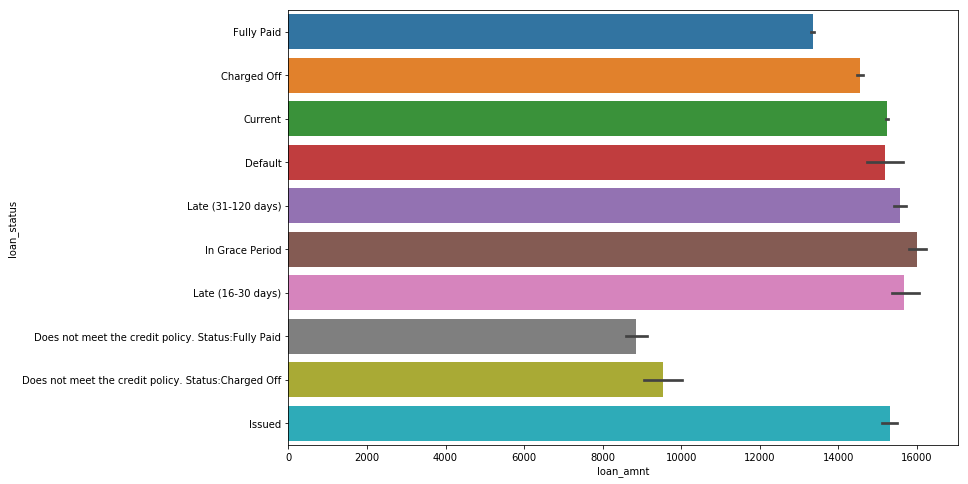

In [8]:
plt.figure(figsize=(12,8))
sns.barplot('loan_amnt','loan_status',data=loan,palette='tab10')

In [10]:
#charged off: declaration by a creditor that an amount of debt is unlikely to be collected, happens
# when a consumer becomes severely delinquent on a debt 
# traditionally, make this declaration at the point of 6 months without payment
#default: failure to repay a loan

### The two columns, does not meet the credit policy: status fully paid/ charged off are confusing to me, why the loans fully paid but not meeting the credit policy. i feel like these are records from previous time and may need to be excluded from our dataset before doing any further analysis

In [19]:
loan_copy.shape

(887379, 53)

In [21]:
loan_copy=loan_copy[loan_copy['loan_status']!='Does not meet the credit policy. Status:Charged Off']

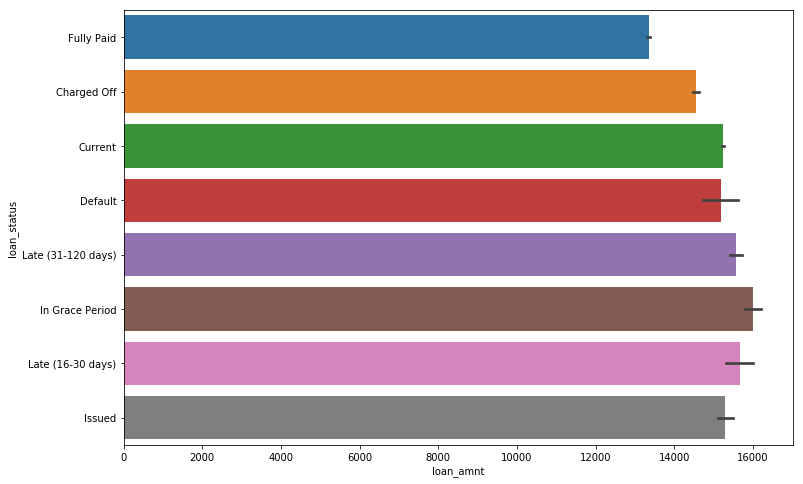

In [27]:
plt.figure(figsize=(12,8))
sns.barplot('loan_amnt','loan_status',data=loan_copy,palette='tab10')

### issued can be misleading for analysis too cause there is no feedback from this group of people yet

In [22]:
loan_copy=loan_copy[loan_copy['loan_status']!='Issued']

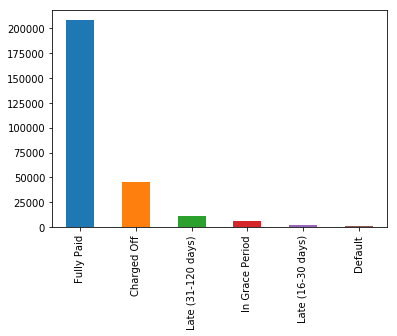

In [139]:

loan_copy['loan_status'].value_counts().plot(kind='bar')
plt.show()

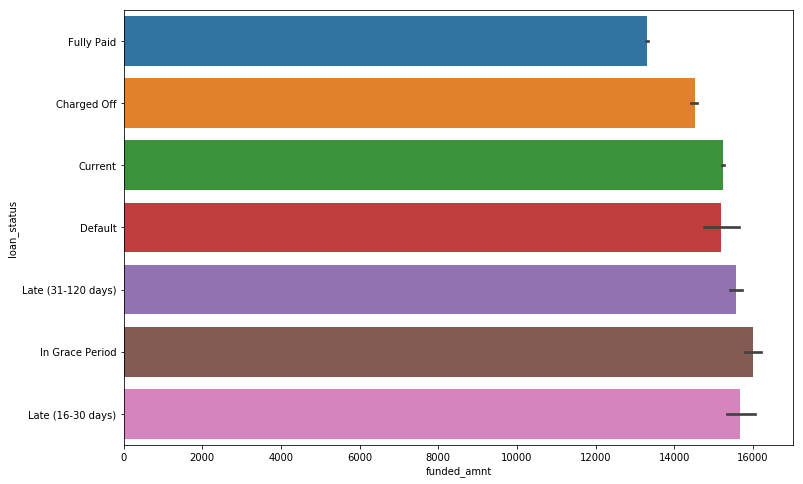

In [33]:
plt.figure(figsize=(12,8))
sns.barplot('funded_amnt','loan_status',data=loan_copy,palette='tab10')

In [34]:
# it is found from the above graph that the more people borrowed the less likely to pay off
# there is the trend

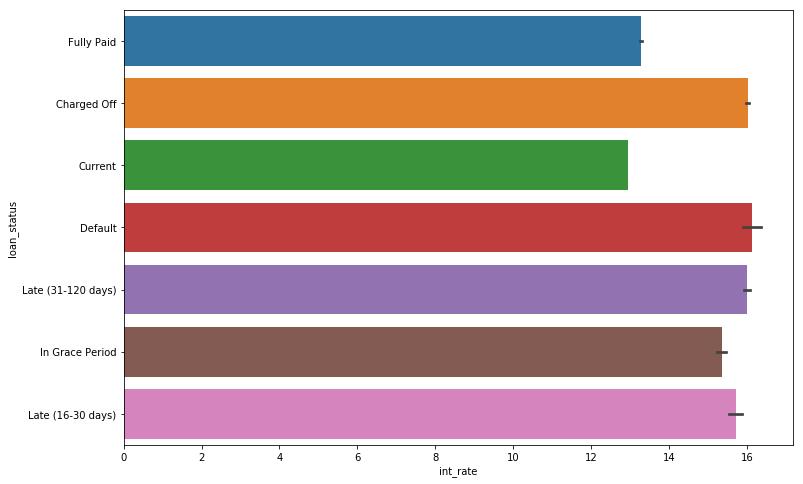

In [32]:
plt.figure(figsize=(12,8))
sns.barplot('int_rate','loan_status',data=loan_copy,palette='tab10')

In [35]:
# maybe bad status of loan tend to have higher interest rate which is understandable

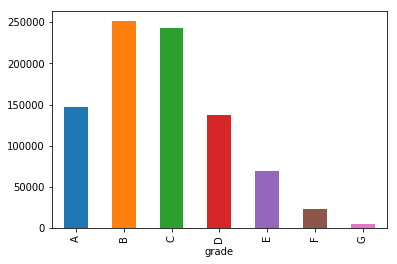

In [46]:
loan_copy.groupby('grade').count()['loan_status'].plot(kind='bar')

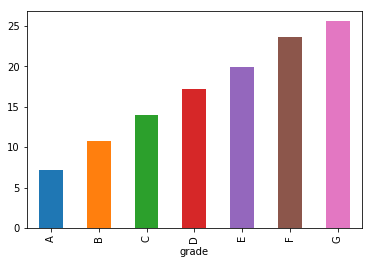

In [43]:
loan.groupby('grade').mean()['int_rate'].plot(kind='bar')

In [42]:
#loan.groupby('grade').mean()['annual_inc']

### now I want to check whether grade and loan status are correlated, chi square independence test might be able to tell

In [51]:
#use pandas crosstab function to create one way frequency table

In [52]:
my_tab=pd.crosstab(index=loan_copy['grade'], columns='count')

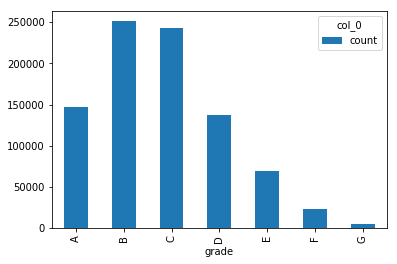

In [53]:
my_tab.plot.bar()

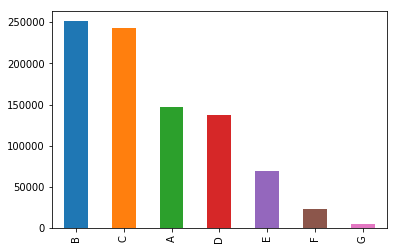

In [54]:
loan_copy['grade'].value_counts().plot.bar()

In [55]:
# equally the same, but crosstab can create table

In [61]:
loan_copy.groupby(['loan_status','grade']).size()

loan_status         grade
Charged Off         A          2617
                    B          9519
                    C         12642
                    D         10486
                    E          6258
                    F          2934
                    G           792
Current             A        103322
                    B        171735
                    C        171175
                    D         91984
                    E         47061
                    F         13589
                    G          2913
Default             A            47
                    B           198
                    C           360
                    D           312
                    E           201
                    F            79
                    G            22
Fully Paid          A         39679
                    B         66546
                    C         52678
                    D         30020
                    E         12928
                    F          4726
  

In [62]:
# then create a two-way table


In [72]:
table=pd.crosstab(columns=loan_copy['loan_status'],index=loan_copy['grade'])

In [74]:
table

loan_status,Charged Off,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,
A,2617,47,39679,365,134,492
B,9519,198,66546,1240,410,2004
C,12642,360,52678,1887,678,3339
D,10486,312,30020,1405,569,2890
E,6258,201,12928,908,368,1852
F,2934,79,4726,354,155,768
G,792,22,1146,94,43,246


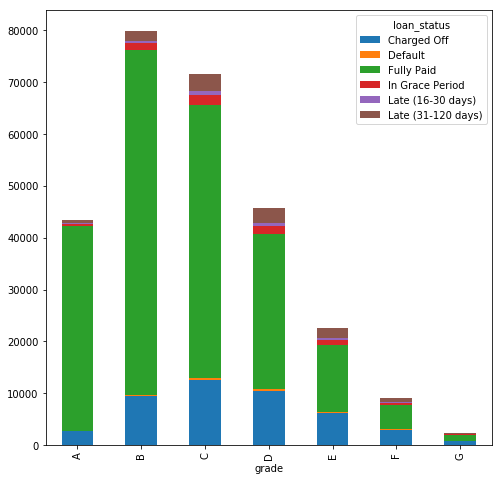

In [73]:
table.plot(kind='bar', figsize=(8,8),stacked=True)

In [67]:
loan_copy['term'].value_counts()

 36 months    612705
 60 months    263465
Name: term, dtype: int64

### because there are too many current makes it skewed dataset, i will drop this column for now

In [24]:
loan_copy=loan_copy[loan_copy['loan_status']!='Current']

In [25]:
loan_copy['loan_status'].value_counts()

Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

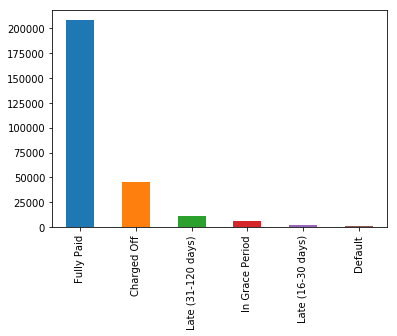

In [26]:
loan_copy['loan_status'].value_counts().plot(kind='bar')

In [80]:
tab2=pd.crosstab(index=loan_copy['loan_status'], columns='count')

In [82]:
tab2/tab2.sum()

col_0,count
loan_status,
Charged Off,0.164903
Default,0.004443
Fully Paid,0.757033
In Grace Period,0.022789
Late (16-30 days),0.008590
Late (31-120 days),0.042243


### first i will deduce everything to a binary classification problem and then use logistic regression to solve, then without any feature engineering i will use multi-logistic regression to predict loan_status

In [84]:
# now devide loans into two categories, bad and good

In [27]:
bad_loan=['Charged off','Default','In Grace Period','Late (16-30 days)','Late (31-120 days)']

In [28]:
# bad_loan return 0 , good loan return 1
def loan_condition(status):
    if status in bad_loan:
        return 0
    else:
        return 1
    

In [29]:
loan_copy['loan_condition']=loan_copy['loan_status'].apply(loan_condition)

In [30]:
loan_copy['loan_condition'].value_counts()

1    252971
0     21420
Name: loan_condition, dtype: int64

In [39]:
loan_copy.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_reported_time',
       'earliest_reported_year', 'issue_time', 'issue_year',
       'loan_condition'], dtype=object)

[Text(0,0.5,'(%)')]

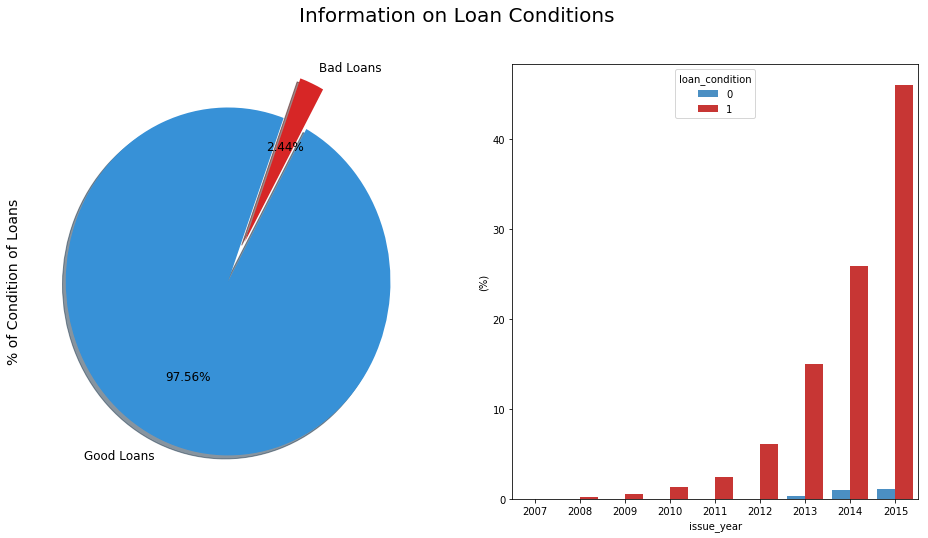

In [41]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan_copy["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="issue_year", y="loan_amnt", hue="loan_condition", data=loan_copy, palette=palette, estimator=lambda x: len(x) / len(loan_copy) * 100)
ax[1].set(ylabel="(%)")

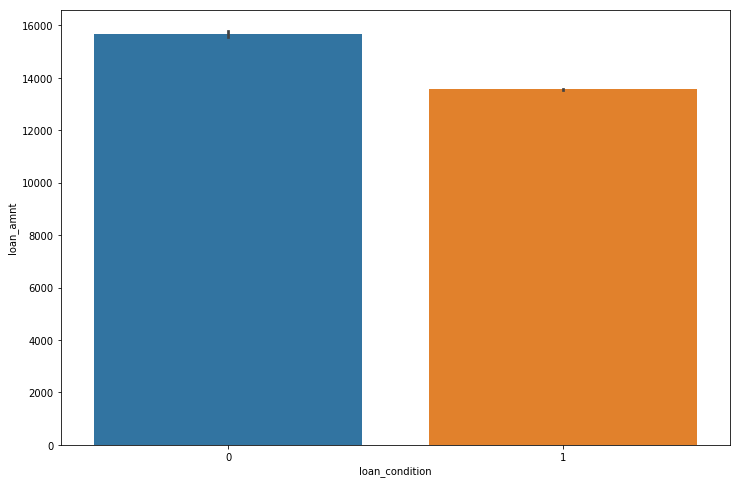

In [95]:
plt.figure(figsize=(12,8))
sns.barplot('loan_condition','loan_amnt',data=loan_copy,palette='tab10')

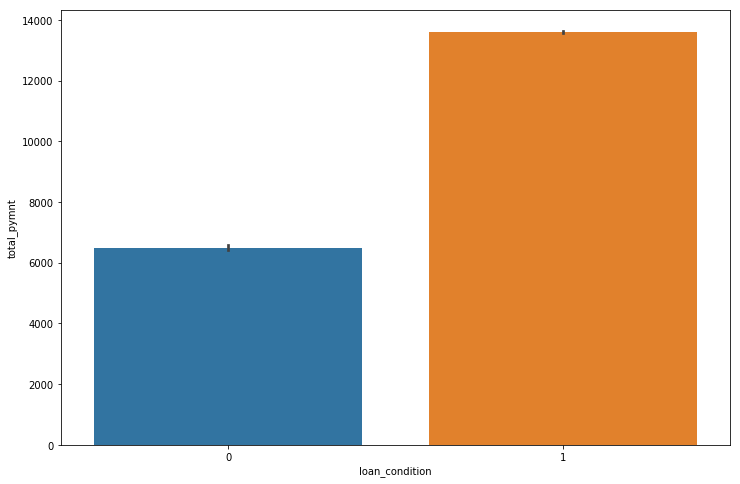

In [98]:
plt.figure(figsize=(12,8))
sns.barplot('loan_condition','total_pymnt',data=loan_copy,palette='tab10')

In [99]:
# total_pymnt is definitely useful in differentiating loan_condition

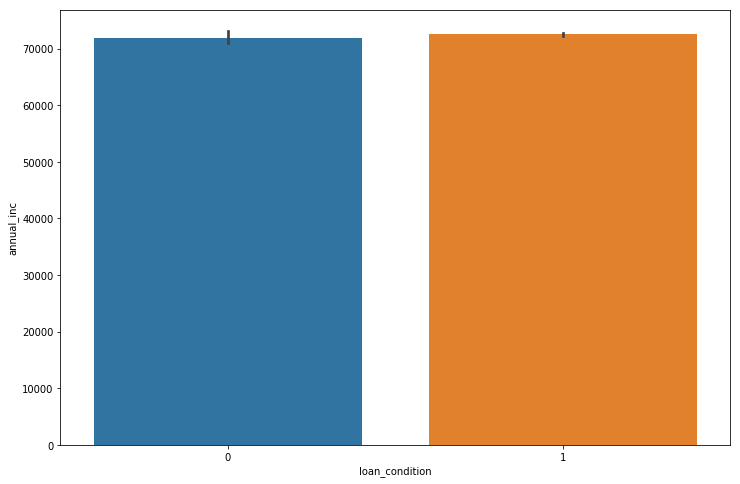

In [100]:
plt.figure(figsize=(12,8))
sns.barplot('loan_condition','annual_inc',data=loan_copy,palette='tab10')

In [101]:
# annual income does not seem to have much information in differentiating the loan_condition

In [102]:
loan_copy['collections_12_mths_ex_med'].describe()

count    274391.000000
mean          0.007613
std           0.094668
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: collections_12_mths_ex_med, dtype: float64

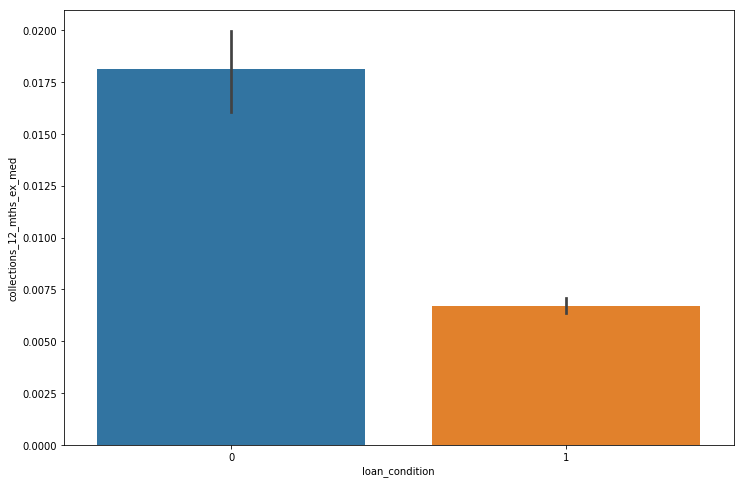

In [103]:
plt.figure(figsize=(12,8))
sns.barplot('loan_condition','collections_12_mths_ex_med',data=loan_copy,palette='tab10')

In [104]:
# this looks promising, it means number of collections in 12 months excluding medical collection
# apparently the more collections the more likely loan be paid off

In [106]:
table_app_type=pd.crosstab(columns=loan_copy['loan_condition'],index=loan_copy['application_type'])
print(table_app_type)

loan_condition        0       1
application_type               
INDIVIDUAL        21415  252970
JOINT                 5       1


In [107]:
#mostly individual applications, no need to add into feature then

In [23]:
loan_copy['issue_year'].describe()

count    887379.000000
mean       2014.021761
std           1.261741
min        2007.000000
25%        2013.000000
50%        2014.000000
75%        2015.000000
max        2015.000000
Name: issue_year, dtype: float64

In [111]:
table_app_type=pd.crosstab(columns=loan_copy['loan_condition'],index=loan_copy['issue_year'])
print(table_app_type)

loan_condition     0      1
issue_year                 
2007               0    251
2008               0   1562
2009               0   4716
2010               8  11521
2011              93  19675
2012             360  49563
2013            3259  71232
2014            8376  68694
2015            9324  25757


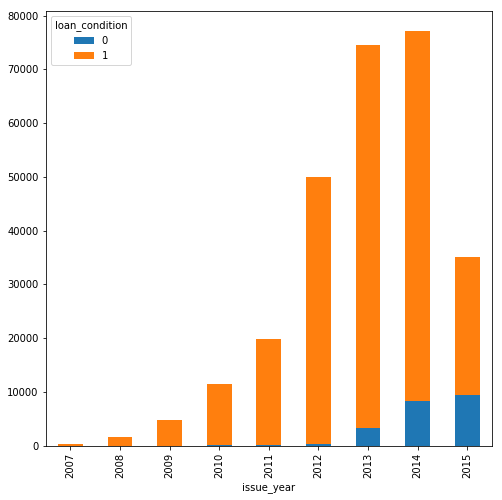

In [112]:
table_app_type.plot(kind='bar', figsize=(8,8),stacked=True)

In [113]:
# majority are good loans

In [114]:
loan_copy['initial_list_status'].value_counts()

f    193471
w     80920
Name: initial_list_status, dtype: int64

In [116]:
loan_copy['verification_status'].value_counts()

Verified           100925
Not Verified        90739
Source Verified     82727
Name: verification_status, dtype: int64

In [119]:
#loan_copy['earliest_cr_line'].value_counts()     #too many rows

In [121]:
loan_copy['revol_bal'].describe()

count    2.743910e+05
mean     1.519927e+04
std      1.885935e+04
min      0.000000e+00
25%      5.880000e+03
50%      1.094400e+04
75%      1.908650e+04
max      1.746716e+06
Name: revol_bal, dtype: float64

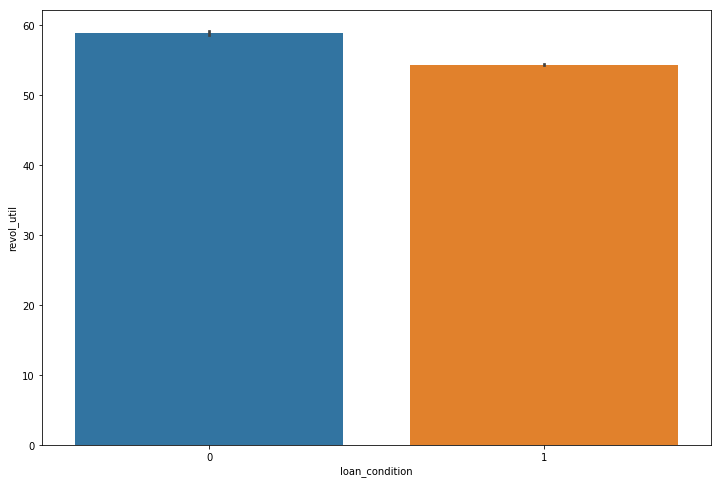

In [124]:
plt.figure(figsize=(12,8))
sns.barplot('loan_condition','revol_util',data=loan_copy,palette='tab10')

In [ ]:
#total_acc

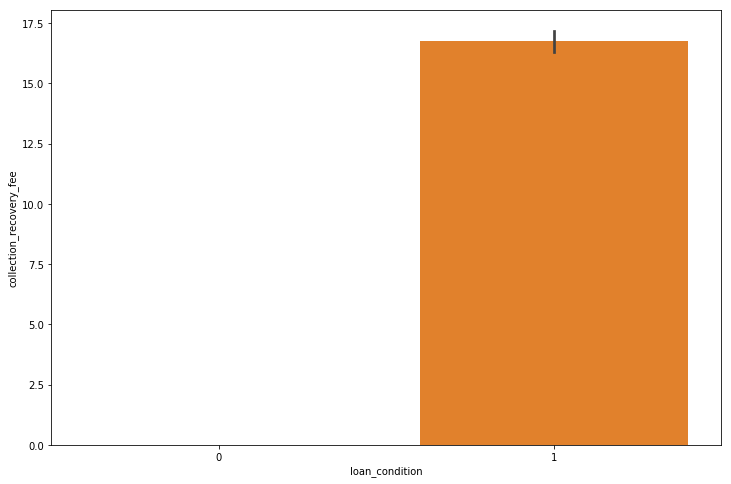

In [127]:
plt.figure(figsize=(12,8))
sns.barplot('loan_condition','collection_recovery_fee',data=loan_copy,palette='tab10')

In [135]:
loan_copy.groupby('loan_condition').count()['collection_recovery_fee']


loan_condition
0     21420
1    252971
Name: collection_recovery_fee, dtype: int64

###  now build a binary logistic regression


In [37]:
# first will use following categorical features
cat_vars

['term',
 'grade',
 'home_ownership',
 'initial_list_status',
 'verification_status',
 'pymnt_plan']

In [38]:
# numerical features
cont_vars

['loan_amnt',
 'funded_amnt',
 'total_pymnt',
 'collections_12_mths_ex_med',
 'revol_util',
 'collection_recovery_fee',
 'tot_coll_amt',
 'tot_cur_bal',
 'issue_year']

In [140]:
# now encode all categorical features

In [33]:
loan_copy.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_reported_time,earliest_reported_year,issue_time,issue_year,loan_condition
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1985-01-01,1985,2011-12-01,2011,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1999-04-01,1999,2011-12-01,2011,1


In [39]:
from sklearn import preprocessing

In [40]:
log_loan=loan_copy[cat_vars].join(loan_copy[cont_vars])

In [41]:
log_loan_cont=loan_copy[cont_vars]

In [36]:
log_loan.head(2)

,term,grade,home_ownership,initial_list_status,verification_status,pymnt_plan,loan_amnt,funded_amnt,total_pymnt,collections_12_mths_ex_med,revol_util,collection_recovery_fee,tot_coll_amt,tot_cur_bal,issue_year
0,36 months,B,RENT,f,Verified,n,5000.0,5000.0,5861.071414,0.0,83.7,0.00,0.0,80559.0,2011
1,60 months,C,RENT,f,Source Verified,n,2500.0,2500.0,1008.710000,0.0,9.4,1.11,0.0,80559.0,2011


In [37]:
log_loan.shape

(887379, 15)

In [42]:
log_loan.dtypes

term                           object
grade                          object
home_ownership                 object
initial_list_status            object
verification_status            object
pymnt_plan                     object
loan_amnt                     float64
funded_amnt                   float64
total_pymnt                   float64
collections_12_mths_ex_med    float64
revol_util                    float64
collection_recovery_fee       float64
tot_coll_amt                  float64
tot_cur_bal                   float64
issue_year                      int64
dtype: object

In [43]:
log_loan['term'].dtype=='object'

True

In [180]:
log_loan.dtypes

term                            int64
grade                           int64
home_ownership                  int64
initial_list_status             int64
verification_status             int64
pymnt_plan                      int64
loan_amnt                     float64
funded_amnt                   float64
total_pymnt                   float64
collections_12_mths_ex_med    float64
revol_util                    float64
collection_recovery_fee       float64
tot_coll_amt                  float64
tot_cur_bal                   float64
issue_year                      int64
dtype: object

In [182]:
loan_copy['home_ownership'].value_counts()

MORTGAGE    134317
RENT        115685
OWN          24204
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

In [181]:
log_loan['home_ownership'].value_counts()

1    134317
5    115685
4     24204
3       141
2        43
0         1
Name: home_ownership, dtype: int64

In [44]:
def encode_category(array):
    if array.dtype=='object':
        return preprocessing.LabelEncoder().fit_transform(array)
    else:
        return array

In [45]:
log_loan=log_loan.apply(encode_category)

In [46]:
log_loan.shape

(274391, 15)

In [47]:
log_loan.head(2)

,term,grade,home_ownership,initial_list_status,verification_status,pymnt_plan,loan_amnt,funded_amnt,total_pymnt,collections_12_mths_ex_med,revol_util,collection_recovery_fee,tot_coll_amt,tot_cur_bal,issue_year
0,0,1,5,0,2,0,5000.0,5000.0,5861.071414,0.0,83.7,0.00,0.0,80559.0,2011
1,1,2,5,0,1,0,2500.0,2500.0,1008.710000,0.0,9.4,1.11,0.0,80559.0,2011


In [ ]:
# label encoder only convert categorical features into numerical values

In [48]:
import pandas as pd
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(log_loan[var],prefix=var)
    log_loan_cont=log_loan_cont.join(cat_list)

In [49]:
log_loan_cont.head(2)

,loan_amnt,funded_amnt,total_pymnt,collections_12_mths_ex_med,revol_util,collection_recovery_fee,tot_coll_amt,tot_cur_bal,issue_year,term_0,...,home_ownership_3,home_ownership_4,home_ownership_5,initial_list_status_0,initial_list_status_1,verification_status_0,verification_status_1,verification_status_2,pymnt_plan_0,pymnt_plan_1
0,5000.0,5000.0,5861.071414,0.0,83.7,0.00,0.0,80559.0,2011,1,...,0,0,1,1,0,0,0,1,1,0
1,2500.0,2500.0,1008.710000,0.0,9.4,1.11,0.0,80559.0,2011,0,...,0,0,1,1,0,0,1,0,1,0


In [50]:
log_loan_cont.shape

(274391, 31)

In [51]:
import pickle

filename='loan_ml.pkl'
pickle.dump(loan_copy, open(filename, 'wb'))  

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/Users/yichu/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
train_x, test_x, train_y, test_y = train_test_split(log_loan_cont,loan_copy['loan_condition'].values
                                                      , train_size=0.7,random_state=123)

In [55]:
train_x.shape

(192073, 31)

In [168]:
# now use default to fit 
clt=LogisticRegression()
clt.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
y_pred_test=clt.predict(test_x)
y_pred_train=clt.predict(train_x)

In [171]:
print('accuracy of logistic regression on training data is :', clt.score(train_x,train_y))

accuracy of logistic regression on training data is : 0.9204885642438031


In [172]:
metrics.accuracy_score(train_y, y_pred_train)

0.9204885642438031

In [173]:
print('accuracy of logistic regression on testing data is :', clt.score(test_x,test_y))

accuracy of logistic regression on testing data is : 0.9196773488179985


In [174]:
# now implement grid search for fine tuning hyperparameter

In [175]:
from sklearn.model_selection import GridSearchCV

In [190]:
np.arange(1e-01, 1.5, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4])

In [194]:
param_grid={'penalty':['l1','l2']}

In [180]:
param_grid['penalty']

['l1', 'l2']

In [195]:
gs=GridSearchCV(LogisticRegression(),param_grid=param_grid, cv=3,n_jobs=3)

In [197]:
#gs.fit(train_x,train_y)

In [198]:
# ahh, my laptop is not powerful enough, grid search is not an option here then

In [199]:
# i just want to see how penalty term affect the result

In [200]:
clt2=LogisticRegression(penalty='l1')
clt2.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
print('accuracy of logistic regression on training data is :', clt2.score(train_x,train_y))
print('accuracy of logistic regression on testing data is :', clt2.score(test_x,test_y))

accuracy of logistic regression on training data is : 0.9237425353901901
accuracy of logistic regression on testing data is : 0.9232488641609369


In [202]:
# training accuracy stays almost the same, testing actually increased

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, clt2.predict(test_x))

array([[ 1061,  5340],
       [  978, 74939]])

In [206]:
from sklearn.metrics import classification_report
print(classification_report(test_y,clt2.predict(test_x)))

             precision    recall  f1-score   support

          0       0.52      0.17      0.25      6401
          1       0.93      0.99      0.96     75917

avg / total       0.90      0.92      0.90     82318



In [207]:
print(classification_report(test_y,clt.predict(test_x)))

             precision    recall  f1-score   support

          0       0.45      0.16      0.23      6401
          1       0.93      0.98      0.96     75917

avg / total       0.90      0.92      0.90     82318



### I think this is actually an issue here, even though the average precision, accuracy looks good, it could be simply due to unbiased data cause group0's report does not look good at all

### explore data geographically, bad loan and good loan

In [13]:
loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [42]:
loan.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_reported_time',
       'earliest_reported_year', 'issue_time', 'issue_year'], dtype=object)

In [43]:
loan['addr_state'][:5]

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

In [46]:
loan_copy['addr_state'].unique().shape

(51,)

In [47]:
#51 states, assign each state to 5 regions

In [7]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


In [4]:
import pickle
filename='loan_copy.pkl'
loan_copy = pickle.load(open(filename, 'rb'))


In [5]:
loan_copy.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_reported_time,earliest_reported_year,issue_time,issue_year,loan_condition
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1985-01-01,1985,2011-12-01,2011,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1999-04-01,1999,2011-12-01,2011,1


In [6]:
loan_copy.shape

(876170, 54)

In [10]:
def regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'Southwest'
    elif state in south_east:
        return 'Southeast'
    elif state in mid_west:
        return 'Midwest'
    #elif state in north_east:
    else:
        return 'Northeast'

In [11]:

loan_copy['region']=loan_copy['addr_state'].apply(regions)

In [12]:
loan_copy['region'].value_counts()

Southeast    211801
West         206351
Northeast    201673
Midwest      153040
Southwest    103305
Name: region, dtype: int64

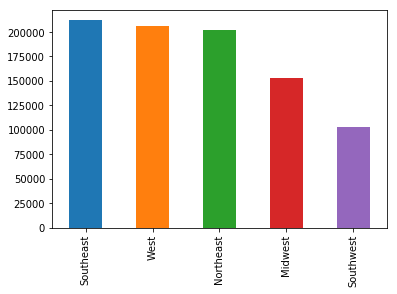

In [13]:
loan_copy['region'].value_counts().plot(kind='bar')

In [ ]:
# now take a look at date vs region, sum of loan amount by region

In [14]:
loan_copy['issue_year'].unique()

array([2011, 2010, 2009, 2008, 2007, 2013, 2012, 2014, 2015])

In [15]:
loan_copy.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_reported_time',
       'earliest_reported_year', 'issue_time', 'issue_year',
       'loan_condition', 'region'], dtype=object)

In [22]:
loan_copy['issue_time'][:5]

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_time, dtype: datetime64[ns]

In [20]:
loan_copy.groupby('region')['loan_amnt'].sum()
#regions' total loan amount

region
Midwest      2.229211e+09
Northeast    3.014232e+09
Southeast    3.099313e+09
Southwest    1.574453e+09
West         3.022026e+09
Name: loan_amnt, dtype: float64

In [ ]:
#southeast, west and northeast had highest amounts of loans issued

In [ ]:
# how to look at time series


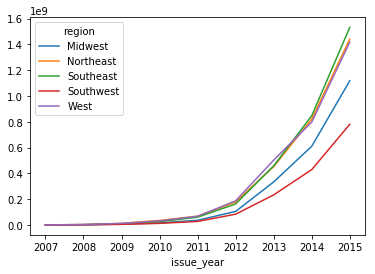

In [68]:
loan_copy.groupby(['issue_year','region']).sum()['loan_amnt'].unstack().plot()

In [ ]:
#unstack is needed, pivoting a level of the row index to the column axis

In [73]:
loan_copy.groupby(['issue_year','region']).sum()['loan_amnt'].unstack()

region,Midwest,Northeast,Southeast,Southwest,West
issue_year,,,,,
2007,2.494500e+05,9.005500e+05,7.209000e+05,81800.0,2.665750e+05
2008,1.903025e+06,3.437950e+06,2.993600e+06,1697175.0,4.358525e+06
2009,6.561225e+06,1.321680e+07,9.372000e+06,4963625.0,1.232268e+07
2010,1.621525e+07,3.570492e+07,2.541352e+07,12721925.0,3.206558e+07
2011,3.680635e+07,6.859818e+07,6.076470e+07,27674000.0,6.784060e+07
2012,1.054075e+08,1.782767e+08,1.631723e+08,84063325.0,1.874912e+08
2013,3.339958e+08,4.530988e+08,4.585702e+08,233458025.0,5.028664e+08
2014,6.101297e+08,8.200379e+08,8.467608e+08,429272875.0,7.976288e+08
2015,1.117943e+09,1.440960e+09,1.531545e+09,780520600.0,1.417186e+09


Text(0.5,1,'loans issued by region')

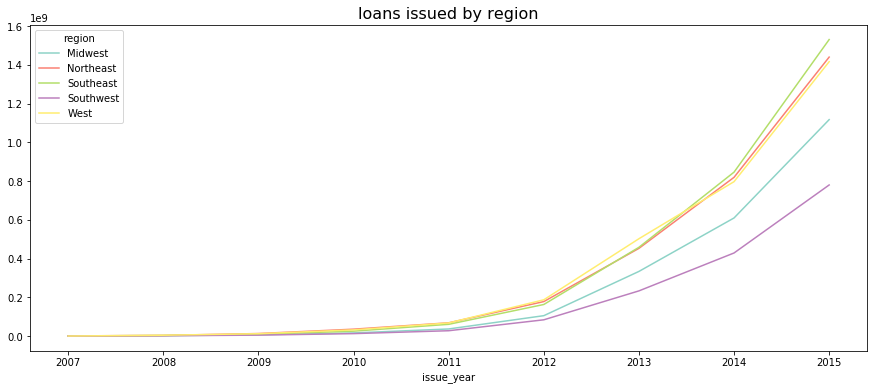

In [71]:
cmap = plt.cm.Set3
loan_copy.groupby(['issue_year','region']).sum()['loan_amnt'].unstack().plot(stacked=False,colormap=cmap, grid=False, legend=True,
                                                                             figsize=(15,6))
plt.title('loans issued by region',fontsize=16)

In [75]:
loan_copy.groupby(['issue_year','region'])['loan_amnt'].sum().unstack()
#contains every region's total loan by year

region,Midwest,Northeast,Southeast,Southwest,West
issue_year,,,,,
2007,2.494500e+05,9.005500e+05,7.209000e+05,81800.0,2.665750e+05
2008,1.903025e+06,3.437950e+06,2.993600e+06,1697175.0,4.358525e+06
2009,6.561225e+06,1.321680e+07,9.372000e+06,4963625.0,1.232268e+07
2010,1.621525e+07,3.570492e+07,2.541352e+07,12721925.0,3.206558e+07
2011,3.680635e+07,6.859818e+07,6.076470e+07,27674000.0,6.784060e+07
2012,1.054075e+08,1.782767e+08,1.631723e+08,84063325.0,1.874912e+08
2013,3.339958e+08,4.530988e+08,4.585702e+08,233458025.0,5.028664e+08
2014,6.101297e+08,8.200379e+08,8.467608e+08,429272875.0,7.976288e+08
2015,1.117943e+09,1.440960e+09,1.531545e+09,780520600.0,1.417186e+09


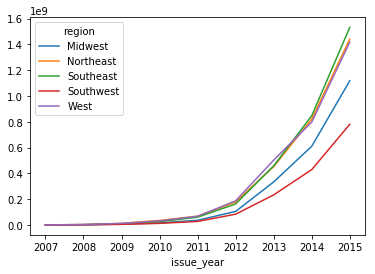

In [76]:
loan_copy.groupby(['issue_year','region'])['loan_amnt'].sum().unstack().plot()

In [36]:
group_dates=loan_copy.groupby(['region','issue_year'], as_index=False).sum()

In [38]:
#group_dates

In [39]:
group_dates['loan_amount']=group_dates['loan_amnt']/1000

In [40]:
df_date=pd.DataFrame(data=group_dates[['issue_year','region','loan_amount']])

In [48]:
df_date
#now i have each region's total loan amount by year in one dataframe


,issue_year,region,loan_amount
0,2007,Midwest,249.450
1,2008,Midwest,1903.025
2,2009,Midwest,6561.225
3,2010,Midwest,16215.250
4,2011,Midwest,36806.350
5,2012,Midwest,105407.500
6,2013,Midwest,333995.800
7,2014,Midwest,610129.675
8,2015,Midwest,1117942.850
9,2007,Northeast,900.550


In [63]:
df_date.groupby(['issue_year','region']).head()

,issue_year,region,loan_amount
0,2007,Midwest,249.450
1,2008,Midwest,1903.025
2,2009,Midwest,6561.225
3,2010,Midwest,16215.250
4,2011,Midwest,36806.350
5,2012,Midwest,105407.500
6,2013,Midwest,333995.800
7,2014,Midwest,610129.675
8,2015,Midwest,1117942.850
9,2007,Northeast,900.550


In [79]:
loan_copy['loan_status'].value_counts()


Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [84]:
loan_copy["loan_condition"].value_counts()

1    854750
0     21420
Name: loan_condition, dtype: int64

### the number of loans that classified as bad loans for each region by its loan status

In [85]:
badloans_df = loan_copy.loc[loan_copy["loan_condition"] == 0] #bad loan 0 good loan 1

In [87]:
badloans_df.shape

(21420, 55)

In [ ]:
# now learn cross table

In [97]:
test = pd.DataFrame({'A' : ['one', 'one', 'two', 'two'] ,
                   'B' : ['A', 'B', 'C','D'] ,
                   'C' : ['foo', 'foo', 'foo', 'bar'] ,
                   'D' : np.random.randn(4),
                   'E' : np.random.randn(4)})

In [98]:
test

,A,B,C,D,E
0,one,A,foo,0.055605,-0.763263
1,one,B,foo,-1.623413,-0.451234
2,two,C,foo,0.286714,0.150274
3,two,D,bar,0.008403,1.667845


In [99]:
pd.crosstab(test.A,test.C)   # frequency table

C,bar,foo
A,,
one,0,2
two,1,1


In [100]:
pd.crosstab(test.A,test.C).apply(lambda r: r/r.sum(), axis=1)

C,bar,foo
A,,
one,0.0,1.0
two,0.5,0.5


In [101]:
pd.crosstab(test.A,test.C).apply(lambda r: r/r.sum(), axis=0)

C,bar,foo
A,,
one,0.0,0.666667
two,1.0,0.333333


In [103]:
pd.crosstab(test.A,test.C).apply(lambda r: r/r.sum())    # default is column wise axis=0

C,bar,foo
A,,
one,0.0,0.666667
two,1.0,0.333333


In [104]:
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])

In [105]:
number_of_loanstatus

loan_status,Default,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,
Midwest,175,926,354,1820
Northeast,263,1625,585,2799
Southeast,297,1579,600,2925
Southwest,166,708,273,1407
West,318,1415,545,2640


In [107]:
pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x:x/x.sum()*100)

loan_status,Default,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,
Midwest,14.356030,14.808892,15.019092,15.701838
Northeast,21.575062,25.987526,24.819686,24.148046
Southeast,24.364233,25.251879,25.456088,25.235096
Southwest,13.617719,11.322565,11.582520,12.138728
West,26.086957,22.629138,23.122613,22.776292


In [111]:
# generally speak, west an southeast has higher percentage in most bad loan status, these two regions
# may not be favorable regions. but here i dont know why

In [ ]:
# represent loan status's percentage of each region among all regions (column wise)

In [108]:
pd.crosstab(badloans_df['region'], badloans_df['loan_status']).sum(axis=1)  # now row wise sum

region
Midwest      3275
Northeast    5272
Southeast    5401
Southwest    2554
West         4918
dtype: int64

In [109]:
number_of_loanstatus['total']=pd.crosstab(badloans_df['region'], badloans_df['loan_status']).sum(axis=1)

In [110]:
number_of_loanstatus

loan_status,Default,In Grace Period,Late (16-30 days),Late (31-120 days),total
region,,,,,
Midwest,175,926,354,1820,3275
Northeast,263,1625,585,2799,5272
Southeast,297,1579,600,2925,5401
Southwest,166,708,273,1407,2554
West,318,1415,545,2640,4918


In [24]:
loan_copy.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_reported_time',
       'earliest_reported_year', 'issue_time', 'issue_year',
       'loan_condition'], dtype=object)

In [25]:
loan_copy['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [26]:
loan_copy['loan_condition'].value_counts()

1    865959
0     21420
Name: loan_condition, dtype: int64

## machine learning to predic loan condition and loan status using undersampling

In [66]:
from sklearn import metrics,svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection

In [56]:
# from previous analysis
log_loan_cont.shape

(274391, 31)

In [57]:
log_loan_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274391 entries, 0 to 887371
Data columns (total 31 columns):
loan_amnt                     274391 non-null float64
funded_amnt                   274391 non-null float64
total_pymnt                   274391 non-null float64
collections_12_mths_ex_med    274391 non-null float64
revol_util                    274391 non-null float64
collection_recovery_fee       274391 non-null float64
tot_coll_amt                  274391 non-null float64
tot_cur_bal                   274391 non-null float64
issue_year                    274391 non-null int64
term_0                        274391 non-null uint8
term_1                        274391 non-null uint8
grade_0                       274391 non-null uint8
grade_1                       274391 non-null uint8
grade_2                       274391 non-null uint8
grade_3                       274391 non-null uint8
grade_4                       274391 non-null uint8
grade_5                       274391 non-

In [58]:
log_loan_cont.isnull().any()

loan_amnt                     False
funded_amnt                   False
total_pymnt                   False
collections_12_mths_ex_med    False
revol_util                    False
collection_recovery_fee       False
tot_coll_amt                  False
tot_cur_bal                   False
issue_year                    False
term_0                        False
term_1                        False
grade_0                       False
grade_1                       False
grade_2                       False
grade_3                       False
grade_4                       False
grade_5                       False
grade_6                       False
home_ownership_0              False
home_ownership_1              False
home_ownership_2              False
home_ownership_3              False
home_ownership_4              False
home_ownership_5              False
initial_list_status_0         False
initial_list_status_1         False
verification_status_0         False
verification_status_1       

In [52]:
loan_copy.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_reported_time',
       'earliest_reported_year', 'issue_time', 'issue_year',
       'loan_condition'], dtype=object)

In [54]:
loan_copy['loan_condition'].value_counts()

1    865959
0     21420
Name: loan_condition, dtype: int64

In [59]:
y=loan_copy['loan_condition']   #this is the target

In [60]:
X=log_loan_cont

In [61]:
X.shape, y.shape

((274391, 31), (274391,))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# dataset is biased, binary classification is highly skewed, so try to use onesided selection a downsampling method

In [63]:
X_train.shape, X_test.shape

((192073, 31), (82318, 31))

In [64]:
y_train.value_counts()

1    177179
0     14894
Name: loan_condition, dtype: int64

In [65]:
y_test.value_counts()

1    75792
0     6526
Name: loan_condition, dtype: int64

In [68]:
#oss=OneSidedSelection()
#X_resampled, y_resampled=oss.fit_sample(X,y)

In [ ]:
#my lap top cannot handle this, i will downsample some

In [69]:
# just want half of the data
x_new,x_new2 , y_new, y_new1 = train_test_split(X, y, test_size=0.5, random_state=42)

In [93]:
x_new.shape

(137195, 31)

In [94]:
y_new.shape

(137195,)

In [95]:
y_new.value_counts()

1    126525
0     10670
Name: loan_condition, dtype: int64

In [82]:
type(x_new.values)

numpy.ndarray

In [89]:
oss=OneSidedSelection()
X_resampled, y_resampled=oss.fit_sample(x_new,y_new,ratio={0: 10, 1: 20})

TypeError: fit_sample() got an unexpected keyword argument 'ratio'

In [97]:
from imblearn.datasets import make_imbalance
X_resampled, y_resampled=make_imbalance(x_new.values, y_new.values,ratio={0: 10670, 1:32010 },min_c=0,random_state=2)

In [98]:
y_resampled.shape

(42680,)

In [99]:
X_resampled.shape

(42680, 31)

In [100]:
import numpy as np
np.unique(y_resampled, return_counts=True)

(array([0, 1]), array([10670, 32010]))

In [101]:
# now becomes more balanced, class 1 is 3 times of class 0

In [ ]:
#split data into training and testing

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [104]:
clt=RandomForestClassifier()
clt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 7398, 22478]))

In [114]:
clt.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [116]:
metrics.accuracy_score(y_test,clt.predict(X_test))

0.9161980631052796

In [118]:
metrics.confusion_matrix(y_test, clt.predict(X_test))

array([[2655,  617],
       [ 456, 9076]])

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clt.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      3272
          1       0.94      0.95      0.94      9532

avg / total       0.92      0.92      0.92     12804



In [141]:
X_train.shape

(29876, 31)

In [142]:
y_train.shape

(29876,)

In [143]:
X_test.shape, y_test.shape

((12804, 31), (12804,))

In [155]:
y_train_pred=clt.predict_proba(X_train)[:,1]
y_test_pred=clt.predict_proba(X_test)[:,1]

In [150]:
np.mean(y_train_pred[:,1])

0.7522526442629537

In [151]:
np.mean(y_train_pred[:,0])

0.24774735573704648

In [152]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

In [156]:
roc_auc_score(y_train, y_train_pred)

0.9998215160293344

In [158]:
precision_score(y_train, y_train_pred>0.5)

0.9976810560114163

In [159]:
recall_score(y_train, y_train_pred>0.5)

0.9952842779606726

In [163]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_train, y_train_pred)

(array([0.00000000e+00, 0.00000000e+00, 4.05515004e-04, 1.75723168e-03,
        7.02892674e-03, 2.01405785e-02, 6.19086240e-02, 1.37604758e-01,
        2.89402541e-01, 5.94890511e-01, 1.00000000e+00]),
 array([0.75705134, 0.92450396, 0.96952576, 0.98700952, 0.99528428,
        0.99893229, 0.99973307, 0.99995551, 1.        , 1.        ,
        1.        ]),
 array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

In [120]:
# looks more balanced than previous result, but precision increases 

In [164]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

In [165]:
fpr_train

array([0.00000000e+00, 0.00000000e+00, 4.05515004e-04, 1.75723168e-03,
       7.02892674e-03, 2.01405785e-02, 6.19086240e-02, 1.37604758e-01,
       2.89402541e-01, 5.94890511e-01, 1.00000000e+00])

In [166]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

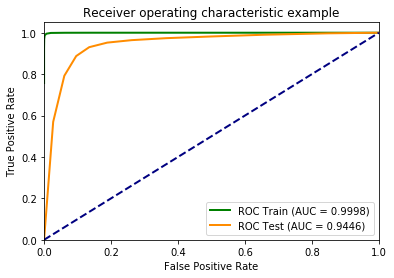

In [169]:
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

In [176]:
# the above model is random forest but features were normalized beforehand which is not necessary actually
# now try to fit a model without feature normalization

In [170]:
#im now wondering what if i use just a logistic regression

In [171]:
from sklearn.linear_model import LogisticRegression


clf_log = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf_log.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf_log.predict(X_train)
p_train_pred = clf_log.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf_log.predict(X_test)
p_test_pred = clf_log.predict_proba(X_test)[:,1]

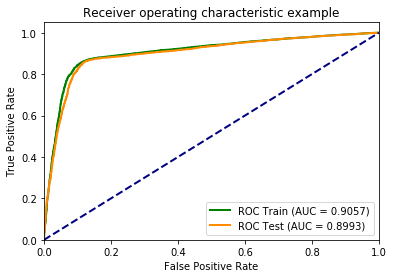

In [173]:
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [174]:
roc_auc_score(y_train, y_train_pred)

0.7365282291818732

### After using undersampling, one sided selection, the confusion matrix makes more sense now, this can greatly enhance the performance of biased data, however, sample size decreases

## explore feature importance

In [127]:
type(X.columns.values)

numpy.ndarray

In [130]:
X.columns.values[0]

'loan_amnt'

In [129]:
for name, imp in zip(X.columns.values,clt.feature_importances_):
    print(name,"=", imp)

loan_amnt = 0.0906721830332776
funded_amnt = 0.09264989934257448
total_pymnt = 0.3400699618082836
collections_12_mths_ex_med = 0.001979168555094283
revol_util = 0.0759183430218435
collection_recovery_fee = 0.035557671144046746
tot_coll_amt = 0.01651804131757692
tot_cur_bal = 0.07824663634444005
issue_year = 0.1564757189150071
term_0 = 0.00842918818801467
term_1 = 0.00865966370297375
grade_0 = 0.0065266728556719845
grade_1 = 0.007637854981514367
grade_2 = 0.006525952479906924
grade_3 = 0.00693681802892651
grade_4 = 0.005969222100885152
grade_5 = 0.003687333837425289
grade_6 = 0.001638708214209094
home_ownership_0 = 5.847963361948442e-08
home_ownership_1 = 0.006460552445741785
home_ownership_2 = 2.2685157767093317e-06
home_ownership_3 = 9.501404927655257e-09
home_ownership_4 = 0.004368822532346937
home_ownership_5 = 0.006176721700461135
initial_list_status_0 = 0.007454244874689246
initial_list_status_1 = 0.011944985333065924
verification_status_0 = 0.006244501661794346
verification_statu

In [132]:
importances=clt.feature_importances_
#sort feature importances in descending order
indices=np.argsort(importances)[::-1]

# rearrange featu renames so they match sorted feature importances
names=[X.columns.values[i] for i in indices]

In [133]:
names   # this is actually the list of fetures ordered importance

['total_pymnt',
 'issue_year',
 'funded_amnt',
 'loan_amnt',
 'tot_cur_bal',
 'revol_util',
 'collection_recovery_fee',
 'tot_coll_amt',
 'initial_list_status_1',
 'term_1',
 'term_0',
 'grade_1',
 'initial_list_status_0',
 'grade_3',
 'verification_status_2',
 'grade_0',
 'grade_2',
 'verification_status_1',
 'home_ownership_1',
 'verification_status_0',
 'home_ownership_5',
 'grade_4',
 'home_ownership_4',
 'grade_5',
 'collections_12_mths_ex_med',
 'grade_6',
 'pymnt_plan_0',
 'pymnt_plan_1',
 'home_ownership_2',
 'home_ownership_0',
 'home_ownership_3']

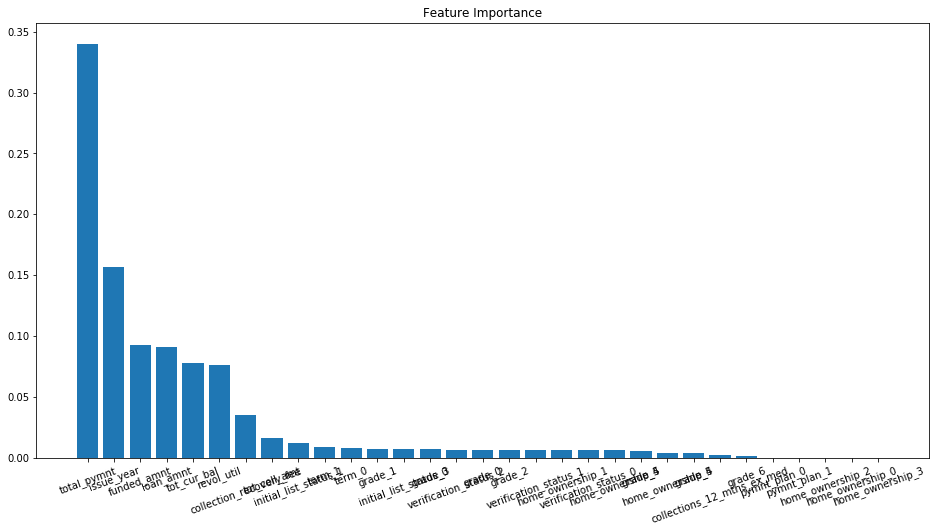

In [138]:
import matplotlib.pyplot as plt
# now plot the importance
plt.figure(figsize=(16,8))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=20,fontsize=10)

plt.title("Feature Importance")
plt.show()

### Further work: train and split stratify 